## Заполни!
Фамилия : Ходжаева

Имя: Полина

Номер группы: 12.02.24 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Variable Description
- `PassengerId`: unique id number to each passenger
- `Survived`: passenger survive(1) or died(0)
- `Pclass`: passenger class
- `Name`: name
- `Sex`: gender of passenger
- `Age`: age of passenger
- `SibSp`: number of siblings/spouses
- `Parch`: number of parents/children
- `Ticket`: ticket number
- `Fare`: amount of money spent on ticket
- `Cabin`: cabin category
- `Embarked`: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

### Задание 1
1. Загрузить данные в виде датафрейма в переменную `titanic`
2. Выведите информацию и статистику по датафрейму.

In [2]:
titanic = pd.read_csv(r'C:\Users\polin\Downloads\titanic.csv', sep = ',')
print(titanic.info())
print(titanic.describe(include = 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

### Задание 2
1. Выведите часть датафрейма, в строках которого пропущено хотябы одно значение.
2. Выведите его размерность.

In [4]:
missing = titanic[titanic.isnull().any(axis=1)]
print(missing)
print('Размерность датафрейма',missing.shape)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

### Задание 3
Найдите и выведите имена столбцов, в которых пропущенных данных более 50%

In [5]:
missing_perc = titanic.isnull().sum() * 100 / len(titanic)
print(missing_perc[missing_perc > 50].index)

Index(['Cabin'], dtype='object')


### Задание 4
Постройте сводную таблицу количества выживщих в зависимости от пола (строки) и порта посадки (колонки). Название порта должно быть полным, для переименования кода порта использовать словарь. 

In [6]:
port_mapping = {
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown"}
# Переименовываем коды портов в полные названия
titanic["Embarked"] = titanic["Embarked"].map(port_mapping)
pivot_table = pd.pivot_table(titanic, values="Survived", index="Sex", 
                             columns="Embarked", aggfunc="sum")
pivot_table

Embarked,Cherbourg,Queenstown,Southampton
Sex,,,
female,64,27,140
male,29,3,77


### Задание 5

Найдите вероятность выживания пассажира в зависимости от класса размещения пассажира, упорядочено по классу пассажира. Результат в виде датафрейма.

In [7]:
survival_by_class = titanic.groupby('Pclass')['Survived'].mean().to_frame().sort_values('Survived', ascending=False)
survival_by_class

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### Задание 6

Постройте `sns.violinplot` для визуализации расходов на билеты в зависимости от порта отправления (на одном графике).

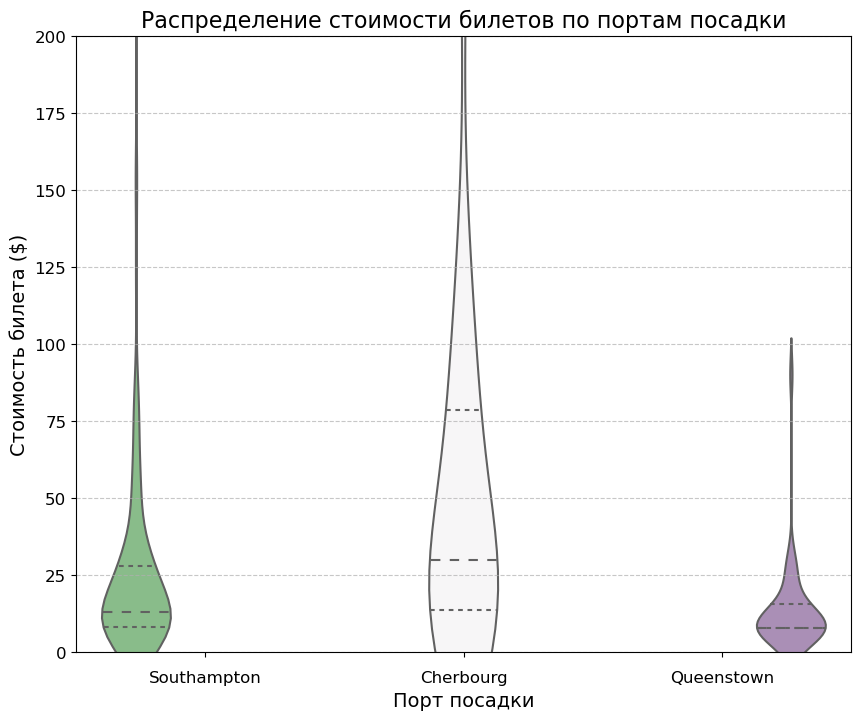

In [19]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='Embarked', y='Fare', data=titanic, hue='Embarked', 
               palette='PRGn_r', inner='quartile')
plt.title('Распределение стоимости билетов по портам посадки', fontsize=16)
plt.xlabel('Порт посадки', fontsize=14)
plt.ylabel('Стоимость билета ($)', fontsize=14)
plt.ylim(0, 200) 
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.legend([],[], frameon=False)
plt.tick_params(axis='x', which='both', pad=10) 
plt.show()

### Задание 7

Постройте `matplotlib.boxplot` для визуализации расходов на билеты в зависимости от класса пассажира (на одном графике). Ограничить диапазон графика от 0 до 200$.

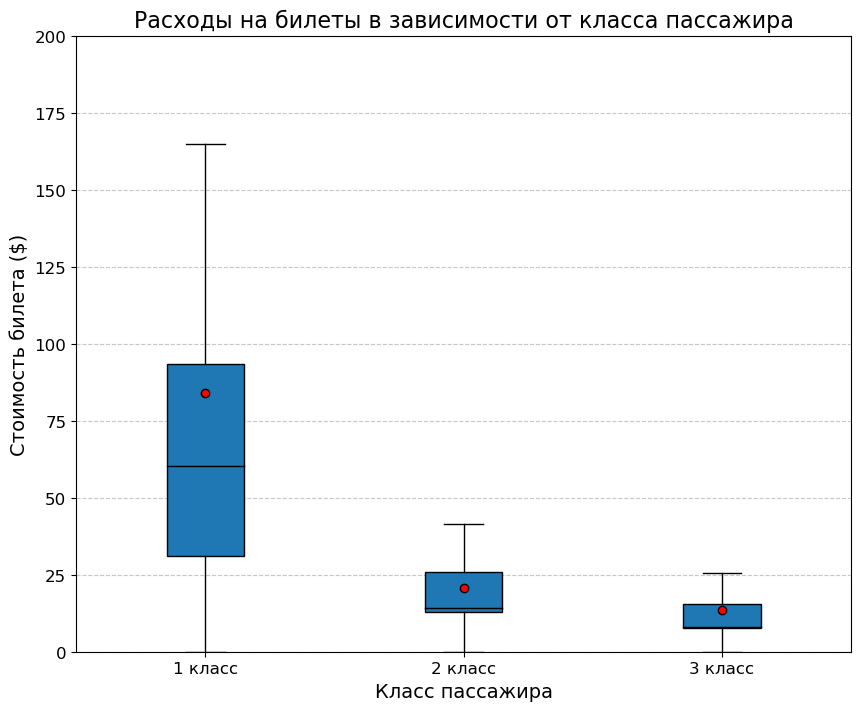

In [9]:
plt.figure(figsize=(10, 8)) 
plt.boxplot([titanic['Fare'][titanic['Pclass'] == 1],
              titanic['Fare'][titanic['Pclass'] == 2],
              titanic['Fare'][titanic['Pclass'] == 3]],
             labels=['1 класс', '2 класс', '3 класс'],
             patch_artist= True,
             showmeans=True, 
             showfliers=False,
             medianprops={'color': 'black'},
             meanprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'black'}) 

plt.title('Расходы на билеты в зависимости от класса пассажира', fontsize=16) 
plt.xlabel('Класс пассажира', fontsize=14)
plt.ylabel('Стоимость билета ($)', fontsize=14)  
plt.ylim(0, 200) 
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.show()

### Задание 8

Визуализируйте корреляционную матрицу для столбцов `["Survived", "Age", "Fare", "SibSp", "Parch" ]`. Максимально корректно для восприятия.

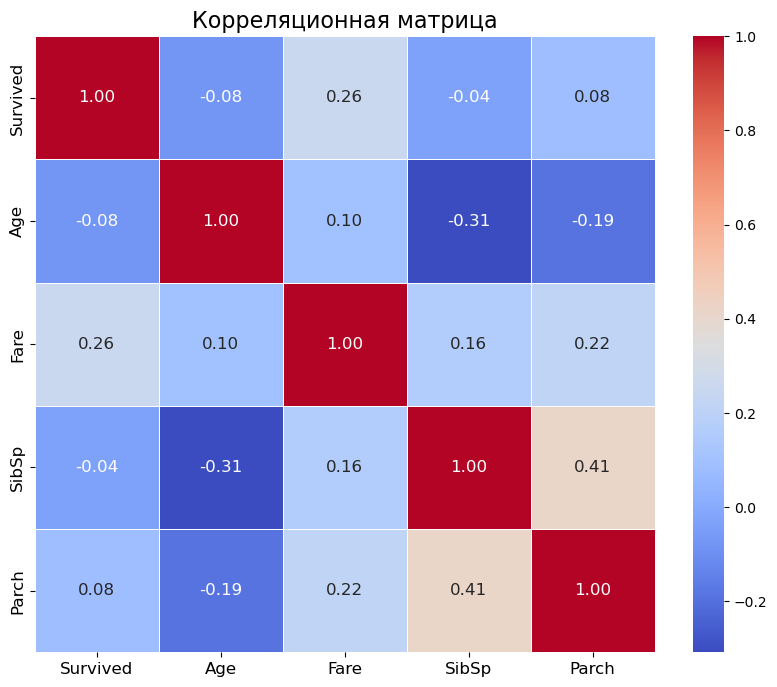

In [10]:
correlation_matrix = titanic[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'fontsize': 12})  # Настраиваем отображение
plt.title('Корреляционная матрица', fontsize=16)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.show()

### Задание 9-10
Используя линии (отрезки) визуализтровать вероятность выживания в зависимости от пола (на соседних графиках) пассажиров различных классов в зависимости от диапазона возраста (диапазон от 0 до 90 с шагом в 10 лет, левая граница не включена, правая включена). 


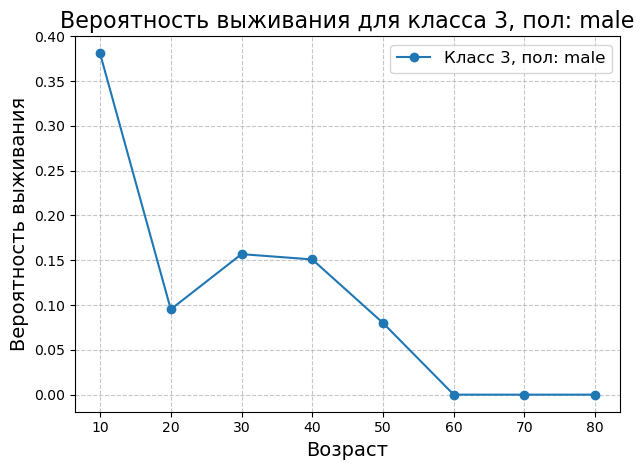

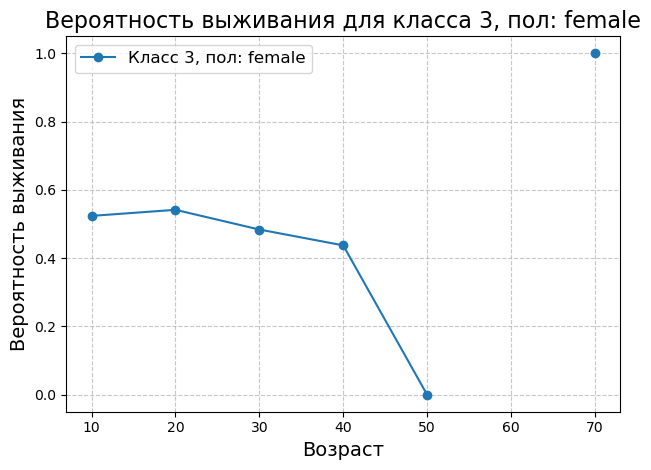

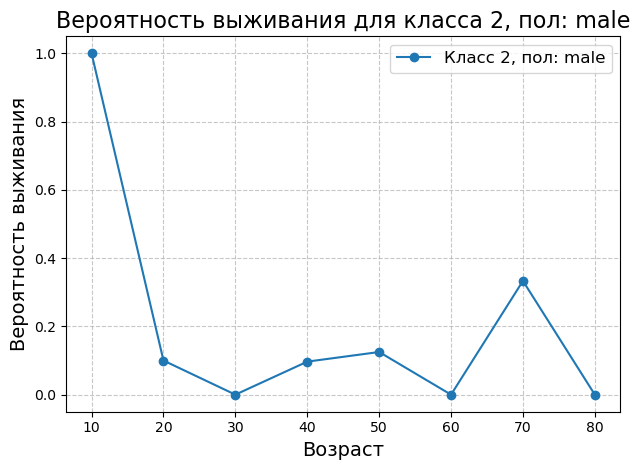

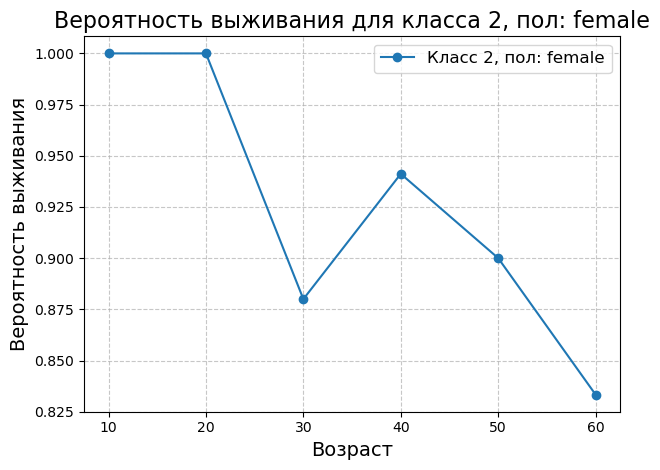

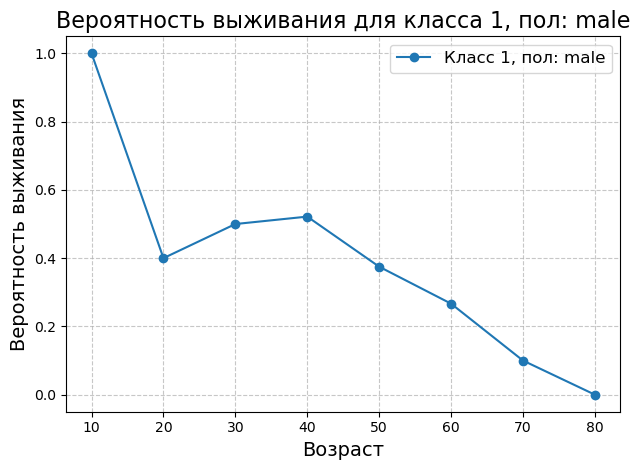

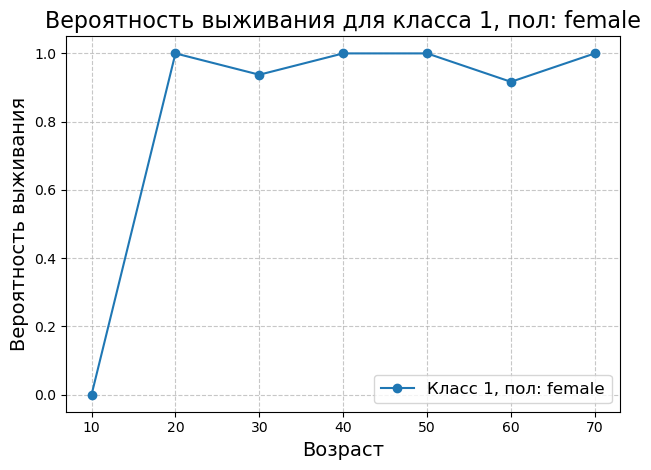

In [11]:
# Если убрать вот эту переменную у меня выводится в порядке 3, 1, 2. Психанула и просто ввела её.
pclass_order = [3, 2, 1]

for pclass in pclass_order:
    for sex in titanic['Sex'].unique():
        subset = titanic[(titanic['Pclass'] == pclass) & (titanic['Sex'] == sex)]
        age_ranges = np.arange(0, 90, 10)
        survival_probs = []
        for i in range(len(age_ranges) - 1):
            age_subset = subset[(subset['Age'] >= age_ranges[i]) & (subset['Age'] < age_ranges[i + 1])]
            survival_prob = age_subset['Survived'].mean()
            survival_probs.append(survival_prob)


        plt.plot(age_ranges[1:], survival_probs, marker='o', linestyle='-', 
                 label=f'Класс {pclass}, пол: {sex}')
        plt.xlabel('Возраст', fontsize=14)
        plt.ylabel('Вероятность выживания', fontsize=14)
        plt.title(f'Вероятность выживания для класса {pclass}, пол: {sex}', fontsize=16)
        plt.grid(True, axis='both', linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.tight_layout()
        plt.show()